In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("Self-Reported_Drinking_Water_Tank_Inspection_Results_20250502.csv")

In [119]:
df.head()

,BIN,BOROUGH,ZIP,HOUSE_NUM,STREET_NAME,BLOCK,LOT,CONFIRMATION_NUM,REPORTING_YEAR,TANK_NUM,...,MEET_STANDARDS,DELETED,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,NTA,BATCH_DATE
0,1016096.0,MANHATTAN,10003.0,5,East 16th Street,844,7501,WTI3191689946,2020,1,...,NaN,No,40.737196,-73.992307,5.0,2.0,52.0,1.008448e+09,Hudson Yards-Chelsea-Flatiron-Union Square,05/02/2025 12:15:27 PM
1,1079341.0,MANHATTAN,10029.0,310,East 102nd Street,1673,6,WTI7977139904,2020,1,...,Y,No,40.787881,-73.943925,11.0,8.0,164.0,1.016730e+09,East Harlem South,05/02/2025 12:15:41 PM
2,1028160.0,MANHATTAN,10023.0,37,West 65th Street,1118,5,WTI0840233874,2023,1,...,NaN,No,40.772281,-73.980363,7.0,6.0,149.0,1.011180e+09,Lincoln Square,05/02/2025 12:15:27 PM
3,1007832.0,MANHATTAN,10014.0,2,CHARLTON STREET,506,27,WTI9325086151,2018,1,...,Y,No,40.726980,-74.003763,2.0,3.0,37.0,1.005060e+09,SoHo-TriBeCa-Civic Center-Little Italy,05/02/2025 12:15:20 PM
4,1036451.0,MANHATTAN,10022.0,560,LEXINGTON AVENUE,1305,13,WTI3391983683,2017,1,...,Y,No,40.756651,-73.972264,5.0,4.0,100.0,1.013050e+09,Turtle Bay-East Midtown,05/02/2025 12:15:12 PM


In [120]:
print(df.columns)
print(df.isna().sum())

Index(['BIN', 'BOROUGH', 'ZIP', 'HOUSE_NUM', 'STREET_NAME', 'BLOCK', 'LOT',
       'CONFIRMATION_NUM', 'REPORTING_YEAR', 'TANK_NUM', 'INSPECTION_BY_FIRM',
       'INSPECTION_PERFORMED', 'INSPECTION_DATE', 'GI_REQ_INTERNAL_STRUCTURE',
       'GI_RESULT_INTERNAL_STRUCTURE', 'GI_REQ_EXTERNAL_STRUCTURE',
       'GI_RESULT_EXTERNAL_STRUCTURE', 'GI_REQ_OVERFLOW_PIPES',
       'GI_RESULT_OVERFLOW_PIPES', 'GI_REQ_ACCESS_LADDERS',
       'GI_RESULT_ACCESS_LADDERS', 'GI_REQ_AIR_VENTS', 'GI_RESULT_AIR_VENTS',
       'GI_REQ_ROOF_ACCESS', 'GI_RESULT_ROOF_ACCESS', 'SI_REQ_SEDIMENT',
       'SI_RESULT_SEDIMENT', 'SI_REQ_BIOLOGICAL_GROWTH',
       'SI_RESULT_BIOLOGICAL_GROWTH', 'SI_REQ_DEBRIS_INSECTS',
       'SI_RESULT_DEBRIS_INSECTS', 'SI_REQ_RODENT_BIRD',
       'SI_RESULT_RODENT_BIRD', 'SAMPLE_COLLECTED', 'LAB_NAME',
       'NYS_CERTIFIED', 'ANALYTES', 'COLIFORM', 'ECOLI', 'MEET_STANDARDS',
       'DELETED', 'LATITUDE', 'LONGITUDE', 'COMMUNITY_BOARD',
       'COUNCIL_DISTRICT', 'CENSUS_TRACT', 'B

# EDA

In [121]:
df["MEET_STANDARDS"] = df["MEET_STANDARDS"].replace({"Y": True, "N": False})

# based on the form they fill out
df["COLIFORM"] = df["COLIFORM"].replace({"P": True, "A": False}) 
df["ECOLI"] = df["ECOLI"].replace(
    {"P": True, "A": False}
)  # based on the form they fill out

In [122]:
print("Duplicates:", df.duplicated().sum())
print(
    "\nStandards Distributions:\n",
    df["MEET_STANDARDS"].value_counts(normalize=True),
    sep="",
)
print(
    "\nColiform Distributions:\n", df["COLIFORM"].value_counts(normalize=True), sep=""
)

print(
    "\nEcoli Distributions:\n", df["ECOLI"].value_counts(normalize=True), sep=""
)

Duplicates: 0

Standards Distributions:
MEET_STANDARDS
True     0.999011
False    0.000989
Name: proportion, dtype: float64

Coliform Distributions:
COLIFORM
False    0.999694
True     0.000306
Name: proportion, dtype: float64

Ecoli Distributions:
ECOLI
False    0.999676
True     0.000324
Name: proportion, dtype: float64


In [123]:
print('Unique Values in "MEET_STANDARDS":', df["MEET_STANDARDS"].unique())
num_nas = df["MEET_STANDARDS"].isna().sum()
num_values = df.shape[0]

print(f'Num NAN in "MEET_STANDARDS": {round(num_nas / num_values, 5) * 100}%')

print()

print('Unique Values in "COLIFORM":', df["COLIFORM"].unique())
num_nas = df["COLIFORM"].isna().sum()
num_values = df.shape[0]

print(f'Num NAN in "COLIFORM": {round(num_nas / num_values, 5) * 100}%')

print()

print('Unique Values in "ECOLI":', df["ECOLI"].unique())
num_nas = df["ECOLI"].isna().sum()
num_values = df.shape[0]

print(f'Num NAN in "ECOLI": {round(num_nas / num_values, 5) * 100}%')

Unique Values in "MEET_STANDARDS": [nan True False]
Num NAN in "MEET_STANDARDS": 80.048%

Unique Values in "COLIFORM": [False nan True]
Num NAN in "COLIFORM": 0.244%

Unique Values in "ECOLI": [False nan True]
Num NAN in "ECOLI": 0.244%


In [124]:
relevant_features = ["ECOLI", "COLIFORM", "MEET_STANDARDS"]

descriptive_stats = df[relevant_features].agg(["mean", "median", "std"])
print(descriptive_stats)

           ECOLI  COLIFORM  MEET_STANDARDS
mean    0.000324  0.000306        0.999011
median  0.000000  0.000000        1.000000
std     0.017985  0.017478        0.031428


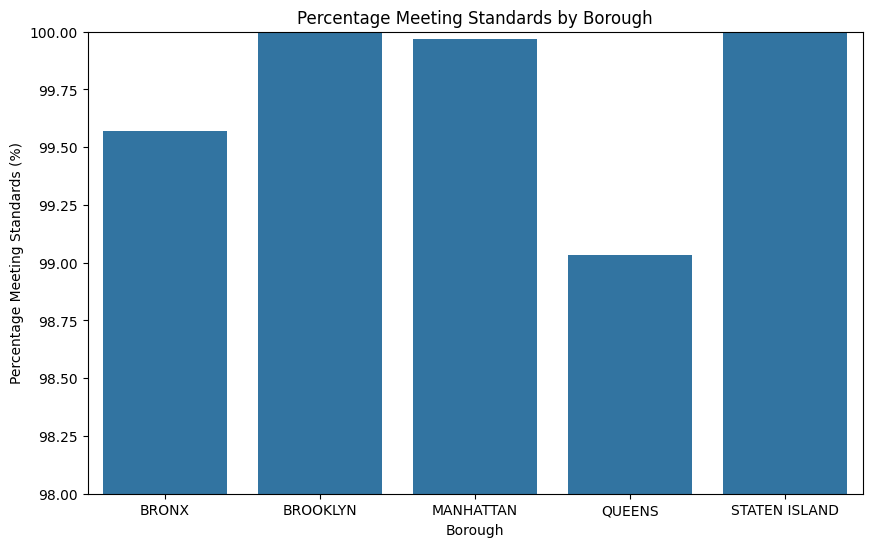

In [125]:
borough_pct = df.groupby('BOROUGH')['MEET_STANDARDS'].mean() * 100
borough_pct = borough_pct.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=borough_pct, x='BOROUGH', y='MEET_STANDARDS', errorbar=None)
plt.title("Percentage Meeting Standards by Borough")
plt.ylabel("Percentage Meeting Standards (%)")
plt.xlabel("Borough")
plt.ylim(98, 100)
plt.show()
